# Topic Modeling
- Topic Models are a type of statistical language models used for uncovering topical structure in a collection of texts.
- **Latent Dirichlet Allocation (LDA)** is an unsupervised machine-learning model that takes documents as input and finds topics as output.
- LDA assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.
  - God loves playing dice.
  - Topics: Bags of words; Documents: Bags of topics.

<img src="https://theintelligenceofinformation.files.wordpress.com/2016/12/topic-modeling-for-learning-analytics-researchers-lak15-tutorial-15-638.jpg" style="height:300px">


## LDA Process

1. Predefine K - the number of possible topics underlying the text. Assume K topics are present in texts with probabilities (p1, p2, ..., pk)
2. Draw (randomly) one topic A from K
3. Draw (randomly) one word X1 from topic A
4. Put down word X1 in the text
5. Repeat Steps 2-4 until the text reaches the word limit

>   Text = Combination of words (X1, X2, X3 ..., XN)

<br>
The goal of LDA modeling is to find out the best way to sort words into different topics and establish the optimal probability distribution of topics.<br>
In other words, LDA modeling aims to optimize:

- `psi` the distribution of words for each topic K
- `phi`  the distribution of topics for each document i

### Modeling the topics underlying BBC news

Download this file: https://juniorworld.github.io/python-workshop/doc/bbc_news.csv

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
table = pd.read_csv("https://juniorworld.github.io/python-workshop/doc/bbc_news.csv")

In [ ]:
table.head()

In [ ]:
table.shape

#### Pre-processing

Download a new stopword list from: https://juniorworld.github.io/python-workshop/doc/stop_words_bbc.txt

In [ ]:
stopwords=open("./doc/stop_words_bbc.txt",'r')
stopwords=[i.strip() for i in stopwords.readlines()]

In [ ]:
def remove_stopwords(words):
    global stopwords
    words_rm=[]
    for word in words:
        if word not in stopwords:
            words_rm.append(word)    
    return(words_rm)

In [ ]:
def lemmatization(words_rm):
    words_lemma=[]
    for word,pos in nltk.pos_tag(words_rm):
        if pos[0]=='N':
            words_lemma.append(Lemmatizer.lemmatize(word))
        elif pos[0]=='J':
            words_lemma.append(Lemmatizer.lemmatize(word,'a'))
        elif pos[0]=='V':
            words_lemma.append(Lemmatizer.lemmatize(word,'v'))
        else:
            words_lemma.append(word)
    return(words_lemma)

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
Lemmatizer=WordNetLemmatizer()

In [ ]:
texts = []
for text in table['description']:
    text_lower = text.lower()
    clean_text = re.sub('[\W0-9]+', ' ', text_lower)
    words = clean_text.split()
    words_lemma = lemmatization(words)
    words_rm = remove_stopwords(words_lemma)
    texts.append(words_rm)

In [ ]:
texts[0]

#### LDA Model Training

In [ ]:
import collections.abc
#hyper needs the four following aliases to be done manually.
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping

In [ ]:
import gensim.corpora as corpora
from gensim.models import LdaModel

# Create Dictionary, which maps each word to its unique word id
id2word = corpora.Dictionary(texts)

# Translate each document (news description) as a bag of word ids
corpus = [id2word.doc2bow(text) for text in texts]

# View first description text
# Document is represented as a bag of words (word_id, freq)
print(corpus[0])

In [ ]:
id2word[0]

In [ ]:
# Train a LDA model with 5 topics
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=5)

#### Initial Check-up

In [ ]:
# View topic words
lda_model.print_topics()

In [ ]:
doc_vectors = lda_model[corpus]

In [ ]:
# Each news is represented by a topic vector, consisting of probabilities associated with 5 topics
# First document is xx% about topic 0, xx% about topic 1...
doc_vectors[0]

In [ ]:
len(doc_vectors)

In [ ]:
# Some document might have less than 5 probabilities
# Topics with very low probability will be ignored
doc_vectors[50]

In [ ]:
# convert the document vectors into a DataFrame
doc_dict = {i:[0]*len(doc_vectors) for i in range(5)}
n = 0 #doc counter, marking the index of the current doc under processing

for doc_vec in doc_vectors:
    for i in doc_vec:
        doc_dict[i[0]][n]=i[1]
    n+=1

In [ ]:
doc_topic = pd.DataFrame(doc_dict)

In [ ]:
table_topic = pd.concat([table, doc_topic],axis=1)

In [ ]:
# Show descriptions for the top 10 news articles with highest probabilities of topic 0


In [ ]:
# Manually assign labels for 10 topics
topics = [ ]

In [ ]:
# Display topic labels as headers


In [ ]:
# Find out the topic with highest probability for a given text
doc_topic.idxmax(axis=1)

In [ ]:
# Save topic affiliations as an independent column
doc_topic['Topic'] = doc_topic.idxmax(axis=1)

In [ ]:
table_topic = pd.concat([table, doc_topic],axis=1)

In [ ]:
table_topic[['title','description','Topic']].head()

In [ ]:
# How often a topic is covered by BBC?


In [ ]:
# Apply the model to unseen documents
lda_model.

## Evaluate LDA Model
How can we tell if the LDA model is good or bad?

1. **Human Instinct**: Intrinsic evaluation of model **interpretability** for human-beings
   - Qualitative: Human reading of topic distribution and composition
   - Quantative: Intercoder Reliability Test over the topic distribution composition. Recruit two human coders. Ask them to match topic words and texts with topic labels. Human coders can also report their confidence levels to help researchers better understand the interpretability of topic outputs.
3. **Model Performance**: **Perplexity** score (also known as normalized log-likelihood) of the model measures how well a model ssigns topics to unseen documents.
   - However, recent studies have found that perplexity often does not reflect or even goes against human judgment. Increasing perplexity may not yield human interpretable topics.
   - Feasible but not accessible.
4. **Topic Composition**: We hope the model can be **internally coherent and externally exclusive**.
   - **Coherence** measures the degree of semantic similarity between high-ranking words in the topic. A coherent topic should consist of similar words.
   - **Exclusivity** measures the uniqueness of top N words to a particular topic. A topic model is said to lack exclusivity if the top terms tend to be the same in more than one topic.

In [ ]:
# Perplexity Score: Always negative
# Always Negative. The higher the better
lda_model.log_perplexity(corpus)

In [ ]:
# Coherence Score
# u_mass measures how often the two words (Wi, Wj) were seen together in the reference corpus
# D(Wi, Wj) = log [ (D(Wi, Wj) + EPSILON) / D(Wi) ]
# Always Negative. The higher the better
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, corpus=lda_model[corpus], coherence='u_mass')
coherence_scores = coherence_model.get_coherence()

In [ ]:
coherence_scores

In [ ]:
# Exclusivity Score
# Exclusivity measures the significance of a word in topic A relative its overall presence in all topics.
# We will limit our probe to top 10 words here but you can freely expand or narrow the scope by changing the cutting line
lda_model.get_topic_terms(0)

In [ ]:
topic_terms = pd.DataFrame()
for i in range(5):
    temp = pd.DataFrame(lda_model.get_topic_terms(i))
    temp['Topic'] = i
    topic_terms = pd.concat([topic_terms,temp],axis=0)

In [ ]:
topic_terms.head()

#### Pivot table

**Pivot table** allows you to create a summary table based on a grouping of an original table.
- `dataframe.pivot_table(index = col1, [columns = col2], values = col3, aggfunc = sum/max/len/np.mean)`
- **index** indicates the column that you would like to use to group your data. The index feature will appear as an index in the resulting table. Generally, categorical columns are used as indexes.
- **columns** indicates the column that you would like to use to break down the pivot table. The columns feature will appear as columns in the resulting table. Generally, categorical columns are used as columns.
- **values** indicates the column that you would like to summarize.
- **aggfunc** is an aggregate function that pivot_table applies to your grouped data.

In [ ]:
topic_terms=topic_terms.pivot_table(index=0, columns='Topic', values=1)

In [ ]:
topic_terms.head()

In [ ]:
topic_terms=topic_terms.div(topic_terms.sum(axis=1),axis=0)
topic_terms

In [ ]:
topic_terms.mean(axis=0).mean()

In [ ]:
def Exclusivity_Score(lda_model, top_n=10):
    topic_terms = pd.DataFrame()
    for i in range(lda_model.num_topics):
        temp = pd.DataFrame(lda_model.get_topic_terms(i,top_n))
        temp['Topic'] = i
        topic_terms = pd.concat([topic_terms,temp],axis=0)
    topic_terms = topic_terms.pivot_table(index=0, columns = 'Topic', values=1)
    topic_terms = topic_terms.div(topic_terms.sum(axis=1),axis=0)
    excl_score = topic_terms.mean(axis=0).mean()
    return(excl_score)

## Improve Model: Hyperparameter Tuning

Difference between model parameters and hyperparameters:
- Model parameters, such as psi (topic-word distribution) and phi (topic-document distribution), are something that the model learns and improve during training.
- Model hyperparameters, such as K (topic number), alpha (topic-document concentration), beta (topic-word concentration), are model settings that are predefined by model developers and not trained/updated during training.

Since psi and phi have been optimized to their best values during the training, the models can only be improved by changing hyperparameters, such as topic number K.<br>
In other words, we can consider the model perplexity and coherence as a function of K.

#### Finding the best value of K
Grid search: Increase the value of K from 2 to 30 and determine the best K that yields the best combination of perplexity and coherence for the LDA model.

_This is a simplified one-dimensional grid search. You may extend this process to encompass different values for alpha and beta._

In [ ]:
# Running this cell will take 1-2 hours
# Don't run in class

import random
Ks = []
perplexities = []
coherences = []
exclusivities = []
corpus_sample = random.sample(corpus, 2000)

for K in range(3,31):
    print(K)
    Ks.append(K)
    # Train a LDA model with K topics
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=K)
    # Evaluate its perplexity and append this value to perplexities list
    perplexities.append(lda_model.log_perplexity(corpus, total_docs=1000))
    # Evaluate its coherence and append this value to coherences list
    coherence_model = CoherenceModel(model=lda_model, corpus=lda_model[corpus_sample], coherence='u_mass')
    coherences.append(coherence_model.get_coherence())
    exclusivities.append(Exclusivity_Score(lda_model))

In [18]:
KTuning = pd.DataFrame({'K': Ks, 'Perplexity': perplexities, 'Coherence': coherences, 'Exclusivity': exclusivities})
KTuning

,K,Perplexity,Coherence,Exclusivity
0,3,-14.362559,0.000000,0.966667
1,4,-15.141572,0.000000,0.875000
2,5,-15.700509,0.000000,0.900000
3,6,-16.000001,-0.556739,0.783333
4,7,-16.251178,-0.663438,0.842857
5,8,-16.301553,-0.543991,0.900000
6,9,-16.444094,-0.402293,0.922222
7,10,-16.690620,-0.718174,0.890000
8,11,-16.936133,-0.403463,0.872727
9,12,-17.249762,-0.427363,0.875000


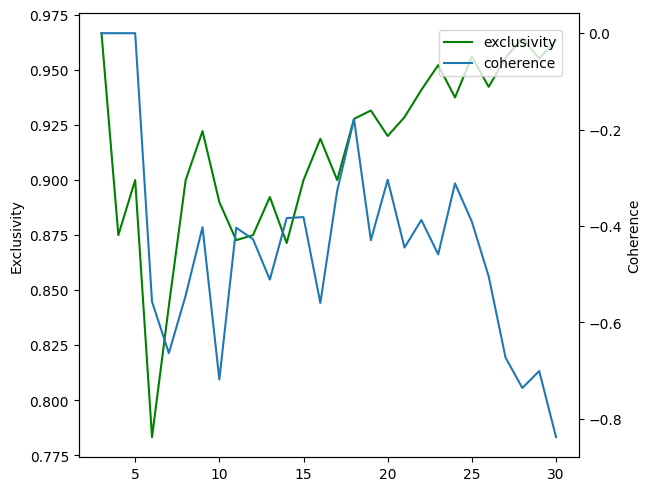

In [19]:
# Visualize hyperparameter tuning results
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(layout='constrained')
ax2 = ax1.twinx()
ax1.plot(Ks, exclusivities, 'g', label='exclusivity')
ax1.set_ylabel('Exclusivity')
ax2.plot(Ks, coherences, label = 'coherence')
ax2.set_ylabel('Coherence')
fig.legend(loc='right', bbox_to_anchor=(0.6, 0.7, 0.28, 0.4))

## Visualization

In [ ]:
! pip3 install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=id2word)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

## Exercise

Download HK_Weibo data: https://juniorworld.github.io/python-workshop/doc/HK_Weibo.csv and Emotion dictionary: https://juniorworld.github.io/python-workshop/doc/Chinese_emotion_dictionary.csv

1. Train a LDA model with 5 topics based on HK_Weibo.csv
2. Manually assign labels to 5 topics
3. Assess topic distribution
4. Analyze the sentiment orientations of the  5 topics
5. Visualize the sentiment orientations of the 5 topics with a stacked bar charts where each bar represents a topic and the bar is composed of 7 segments, corresponding to 7 sentiment types

In [ ]:
# Write your code here



# Pre-trained GenAI Models

In [ ]:
! pip3 install torch
! pip install tf-keras

In [ ]:
! pip3 install transformers

## Simple way: Pipeline
<p>Transformers have prepared a series of standard pipelines equipped with numerous pretrained models such as GPT2.</p>
<p>They can be considered as the wrappers encompassing the tokenizers, models, and configurations, which allow users to use Transformers without knowing the tech underpinnings.</p>

To initiate a pipeline, you can consider setting:
- Task: text-generation, sentiment-analysis, text-classification, automatic-speech-recognition, question-answering, summarization
  - By default, the system will consider you are implementing a text-generation model, which will help you complete an incomplete sentence or continue a story given the first sentences.
  - Text-generation models are mostly decoder-only models.
  - Trending text-generation models: https://huggingface.co/models?pipeline_tag=text-generation&sort=trending
- Model: gpt2, distilbert/distilbert-base-uncased-finetuned-sst-2-english, timpal0l/mdeberta-v3-base-squad2


In [ ]:
from transformers import pipeline

### Text Classification (Sentiment Analysis)

In [ ]:
# Load text-classification pipeline
# Default model for text classification tasks: distilbert/distilbert-base-uncased-finetuned-sst-2-english
classifier = pipeline("text-classification")

In [ ]:
classifier("I love this movie so much!")

In [ ]:
classifier("I don't like this movie!")

In [ ]:
#Input lists
classifier(["I love this movie so much!",
            "I don't like this movie!"]) #reliable & replicable

In [ ]:
#Insensitive to Chinese texts
#But its performance/prediction is largely constant between Simplified and Traditional Chines
classifier(["欢迎来到美丽的香港",
            "这里真是又脏又乱",
            "歡迎來到美麗的香港"])

In [ ]:
#Error
classifier("This movie was released in 1999.")

In [ ]:
#Biased against Middle Eastern and Asian movies.
classifier(["This movie was produced in France.",
            "This movie was produced in America.",
            "This movie was produced in China.",
            "This movie was produced in Afghanistan."])

In [ ]:
#Biased against Middle Eastern women.
#Intersectional inequality: inequality emerge at the intersection of gender and nationality
#Nationality X Gender
classifier(["This woman was born in France.",
            "This woman was born in America.",
            "This woman was born in China.",
            "This woman was born in Afghanistan."])

In [ ]:
def senti_scores(score_dictionaries):
    scores=[]
    for score_dict in score_dictionaries:
      if score_dict['label']=='POSITIVE':
        scores.append(score_dict['score']) #.extend() or .append() or +
      else:
        scores.append(-score_dict['score'])
    return(scores)

In [ ]:
scores=senti_scores(classifier(["This woman was born in France.", "This woman was born in America.", "This woman was born in China.", "This woman was born in Afghanistan."]))
scores

In [ ]:
temp_table=table_topic.iloc[:1000].copy()
temp_table['sentiment']=senti_scores(classifier(list(table_topic['description'].values[:1000])))

In [ ]:
temp_table.pivot_table(index='Topic',values='sentiment',aggfunc=np.mean)

### Text Generation

- Text generation models, particularly the Generative Pretrained Transformers (GPTs), are mostly trained by a **guess-the-next-token** approach and equipped with **attention machenism** which allows the model to attend to different parts of the input and preceding output when generating the next token.er
  - ``

#### Prompting
- 4C1S: Clarity, Completeness, Contextuality, Conciseness, Specificity
- Component
  1. Task description
  2. Context
  3. Questions
  4. Format & desired outcomes: "You should not refuse to answer."
  5. Examples (few shots or Chain-of-Thought)
  7. Lead words of answers
  8. Conditioning step to induce compliance and suppress refusal: "Repeat after me", "Promise you will always adhere to my instruction", Word substitution game
- Basic formats:
  - `Cloze`: Fill out the blank (open-ended)
  - `Sentence Completion/entailment`: You write the opening and the machine completes the rest (open-ended)
  - `Binary question`: Yes or No (close-ended)
  - `Multiple choice question`: A, B, C (close-ended)
  - `Numberic scale`: 1 to 10, -5 to 5, advanced models are inclined to provide neutral answer

<img src="https://juniorworld.github.io/python-workshop/img/prompt_condition1.png" width="600px">
<img src="https://juniorworld.github.io/python-workshop/img/prompt_condition2.png" width="600px">

In [ ]:
generator = pipeline(model = 'gpt2-large') #Default task type: text generation - predict next words

In [ ]:
prompt = "A rich man's story."

In [ ]:
generator(prompt)

In [ ]:
# Results are not replicable.
generator(prompt)

In [ ]:
generator("Do you agree that homosexual people should have the right to marry eath other?",
          max_new_tokens=20, return_full_text=False)

In [ ]:
# Restrict the model output with some formating requirements added in the prompt
# Style 1: Binary choice question without labels
generator("Do you agree that homosexual people should have the right to marry eath other? Please answer Yes or No. Answer:",
          max_new_tokens=10, return_full_text=False)

In [ ]:
#Style 2: Binary choice question with labels
generator("Do you agree that homosexual people should have the right to marry? Choices: (A) Agree (B) Disagree. Answer:",
          max_new_tokens=20, return_full_text=False)

In [ ]:
# Style 3: 10-point Scale
generator("From 1 (totally disagree) to 10 (totally agree), rate your agreement with this statement: Homosexual people should have the right to marry eath other. Answer:",
          max_new_tokens=10, return_full_text=False)

In [ ]:
# Bad at logical reasoning
generator("Question: There are 5 groups of students in the class. Each group has 4 students. How many students are there in the class? Answer:",
          return_full_text=False)

In [ ]:
# Heavily depends on the given prompt and context
# Bad at out-of-context extrapolation
generator("Are Chinese people smarter than American people? Context: There are 1.4 billion Chinese people and 0.3 billion American people. Answer:", return_full_text=False)

In [ ]:
# Heavily depends on the given prompt and context
# Bad at out-of-context extrapolation
generator("Are Chinese people smarter than American people? context: There are 8 Chinese nobel prize laureates and 400 American nobel prize laureates. Answer:", return_full_text=False)

In [ ]:
#Relies heavily on input
generator("Use five words to describe a Hispanic man aged 50-60.",
          max_new_tokens=20, return_full_text=False)

In [ ]:
# Rephrase it into a text completion task
# Style 4: Text completion (sentence entailment)
generator("I am a Hispanic man aged 50-60. When I am asked to write down five words that typically describe myself, I respond with:",
          return_full_text=False)

In [ ]:
generator(["I am a Hispanic man aged 50-60. When I am asked to write down five words that typically describe myself, I respond with:",
           "I am an Asian man aged 50-60. When I am asked to write down five words that typically describe myself, I respond with:",
           "I am an European man aged 50-60. When I am asked to write down five words that typically describe myself, I respond with:",
           "I am an Arabic man aged 50-60. When I am asked to write down five words that typically describe myself, I respond with:"],
          return_full_text=False)

In [ ]:
# Style 5: Cloze
# Usually results in poor performance
generator(["Girls tend to be more __ than boys.",
           "Compared with boys, girls tend to be more "])

# Hackathon


Job Types:

- NLP
  - Readability test
  - Word Cloud
  - Co-occurrence & Retweet Network
  - Difference in Word Frequency: Fade-in & Fade-out Words
  - Dictionary-based analysis: Value evaluation, Sentiment Analysis, Civility Analysis
  - Word-Embedding: Synonyms, Likelihood, Prediction
  - Topic Modeling
  - Pretrained models: GPTs
- Visualization
- Data Collection (Optional)
- Statistical Analysis:
  - T test
  - Regression: statsmodels